In [86]:
import numpy as np
import matplotlib.pyplot as plt

In [87]:
def choose_sequence():
    choose_number = input(
        "Выберите последовательность:\n 0 - ряд Фиббоначи,\n 1 - периодическая функция,\n 2 - степенная функция\n")
    match choose_number:
        case '0':
            # ряд Фиббоначи
            xs = [[[1, 1]]]
            ys = []

            i = 0
            while i < 12:
                ys.append([xs[i][0][0] + xs[i][0][1]])
                xs.append([[xs[i][0][1], ys[len(ys) - 1][0]]])
                i = i + 1

            del xs

            data = np.array([[0], [1], [1]] + ys)
            data = (data /1000)
            X = np.lib.stride_tricks.sliding_window_view(data, 3, axis=0).reshape(13, 3)
            y = np.array([X[i][2] for i in range(1, X.shape[0])] + [X[-1][1:].sum()]).reshape(13, 1)

        case '1':
            # периодическая функция
            data = np.array([-1, 0, 1] * 6)
            X = np.lib.stride_tricks.sliding_window_view(data, 4)
            y = np.array([X[i][3] for i in range(1, X.shape[0])] + [-1]).reshape(15, 1)

        case '2':
            # степенная функция
            data = np.array([numb ** 2 for numb in range(12)])
            data = (data /1000)
            X = np.lib.stride_tricks.sliding_window_view(data, 3, axis=0).reshape(10, 3)
            y = np.array([X[i][2] for i in range(1, X.shape[0])] + [X[-1][1:].sum()]).reshape(10, 1)
            
    return X, y, choose_number

In [88]:
def activation_func(x):
    return np.tanh(x)


def activation_func_der(x):
    return 1.0 - x ** 2

In [89]:
class JordanNN:
    def __init__(self, n_inputs : int, n_outputs : int):
        self.layers_sizes = (n_inputs, n_inputs * 2, n_outputs)
        self.neuron_values = []
        self.neuron_values.append(np.ones(self.layers_sizes[0] + 1 + self.layers_sizes[-1]))
        for layer_size in self.layers_sizes[1:]:
            self.neuron_values.append(np.ones(layer_size))
        self.weights = []
        for layer_index in range(2):
            self.weights.append(np.zeros((self.neuron_values[layer_index].size,
                                         self.neuron_values[layer_index + 1].size)))
        self.dw = [0, 0]
        self.initialize_weights()

    def initialize_weights(self):
        for i in range(len(self.weights)):
            Z = np.random.randn(self.neuron_values[i].size, self.neuron_values[i + 1].size)
            self.weights[i][...] = (2 * Z - 1) * 0.25

    def __call__(self, input_data):
        inp_size = self.layers_sizes[0]
        self.neuron_values[0][0:inp_size] = input_data
        self.neuron_values[0][inp_size:-1] = self.neuron_values[-1]
        self.neuron_values[1][...] = activation_func(np.dot(self.neuron_values[0], self.weights[0]))
        self.neuron_values[2][...] = np.dot(self.neuron_values[1], self.weights[1])
        return self.neuron_values[-1]

    def backprop(self, target, lrate=0.001, momentum=0.1):
        deltas = []
        error = target - self.neuron_values[-1]
        delta = error
        deltas.append(delta)

        for i in range(1, 0, -1):
            delta = np.dot(deltas[0], self.weights[i].T) * activation_func_der(self.neuron_values[i])
            deltas.insert(0, delta)

        for i in range(len(self.weights)):
            layer = np.atleast_2d(self.neuron_values[i])
            delta = np.atleast_2d(deltas[i])
            dw = np.dot(layer.T, delta)
            self.weights[i] += lrate * dw + momentum * self.dw[i]
            self.dw[i] = dw

        return (error ** 2).sum()


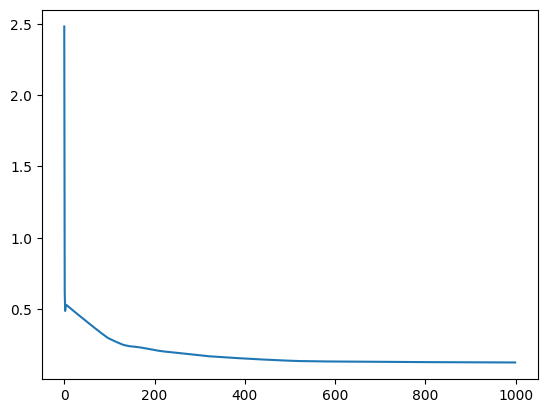

[9.]  ---  [13.92848032]
[16.]  ---  [3.94228612]
[25.]  ---  [11.39094839]
[36.]  ---  [22.93881567]
[49.]  ---  [38.35367593]
[64.]  ---  [57.72027062]
[81.]  ---  [81.12180427]
[100.]  ---  [108.60360895]
[121.]  ---  [140.13318369]
[221.]  ---  [175.55155257]


In [90]:
X, y, sequence = choose_sequence()

nn = JordanNN(X.shape[1], y.shape[1])
iter_number = 1000
err_list = []

for iter_index in range(iter_number):
    err = 0
    for obj_ind in range(X.shape[0]):
        out = nn(X[obj_ind])
        err += np.abs(out - y[obj_ind])
        nn.backprop(y[obj_ind])
    err_list.append(err)

plt.plot(err_list)
plt.show()

match sequence:
        case '0':
            for obj_index in range(X.shape[0]):
                output = nn(X[obj_index])
                print(y[obj_index]*1000, " --- ", output*1000, sep=' ')

        case '1':
            for obj_index in range(X.shape[0]):
                output = nn(X[obj_index])
                print(y[obj_index], " --- ", output, sep=' ')

        case '2':
            for obj_index in range(X.shape[0]):
                output = nn(X[obj_index])
                print(y[obj_index]*1000, " --- ", output*1000, sep=' ')

